VISHAL KUMAR
226101005 

2023-04-02 18:38:50.829104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 18:38:56.681999: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-02 18:38:56.682071: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 18:39:15.940363: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

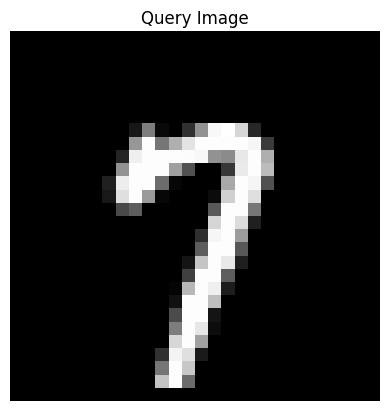

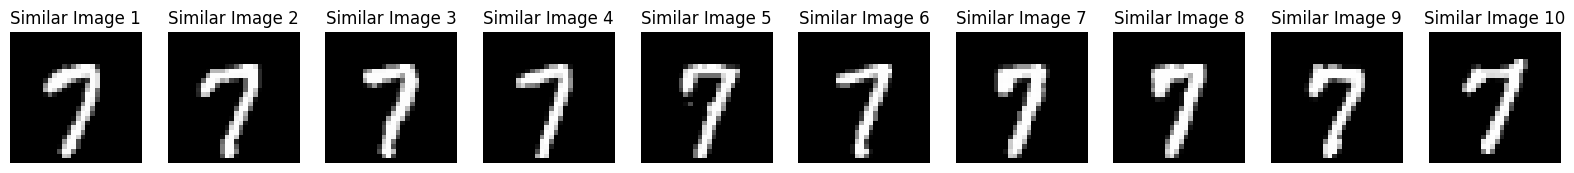

Query Image Label:  7
Similar Image 1 Label:  7
Similar Image 2 Label:  7
Similar Image 3 Label:  7
Similar Image 4 Label:  7
Similar Image 5 Label:  7
Similar Image 6 Label:  7
Similar Image 7 Label:  7
Similar Image 8 Label:  7
Similar Image 9 Label:  7
Similar Image 10 Label:  7
Search Precision is :: 1.0


In [1]:
from keras.datasets import mnist
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from sklearn.metrics import precision_score
import pandas as pd
import matplotlib.pyplot as plt
import  numpy.linalg as la
import cv2
import os
# from google.colab.patches import cv2_imshow

def PCAandKDTree(d,ls,kvalue): 
 (X_train, y_train), (X_test, y_test) = mnist.load_data()

 # Step 2: Reshape the data into 784*1 vector
 X_train = np.reshape(X_train, (X_train.shape[0], 784))
 X_test = np.reshape(X_test, (X_test.shape[0], 784))

 # Step 3: Apply PCA dimensionality reduction
 pca = PCA(n_components=d)
 X_train_pca = pca.fit_transform(X_train)

 # Construct a KD-Tree from the MNIST training data
 kdtree = KDTree(X_train_pca, leaf_size=ls)

 # Choose a random image from the test set
 query_image = X_test[np.random.randint(X_test.shape[0])]

 # Apply PCA dimensionality reduction to the query image
 query_image_pca = pca.transform(query_image.reshape(1, -1))

 # Perform a KD-Tree search for the 10 most similar images to the query image
 distances, indices = kdtree.query(query_image_pca, k=kvalue)

 # Get the corresponding labels for the similar images
 labels = y_train[indices[0]]
 import matplotlib.pyplot as plt
 
 plt.imshow(query_image.reshape(28, 28), cmap='gray')
 plt.title('Query Image')
 plt.axis('off')
 plt.show()
 
 fig, axes = plt.subplots(1, kvalue, figsize=(20, 2))

 for i, index in enumerate(indices[0]):
    axes[i].imshow(X_train[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Similar Image {i+1}')
    axes[i].axis('off')

 plt.show()
 print("Query Image Label: ", y_test[np.argwhere(np.all(X_test == query_image, axis=1))[0][0]])
 c = 0
 for i, index in enumerate(indices[0]):
     if ( y_test[np.argwhere(np.all(X_test == query_image, axis=1))[0][0]] ==  y_train[index]):
       c = c+1
     print(f"Similar Image {i+1} Label: ", y_train[index])

 print(f"Search Precision is :: {c/len(labels)}")

PCAandKDTree(100,30,10)

In [3]:
import cv2
import os
import numpy as np

def load_images_from_folder(folder):
    images = []
    data = []
    count = 1
    list_images = sorted(os.listdir(folder))
    for filename in list_images:
        img = cv2.imread(os.path.join(folder,filename))
        # Convert image to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)
        
        # Resize image to 50%
        scale_percent = 50
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dsize = (width, height)
        img = cv2.resize(img, dsize)
        
        # Flatten image and append to data list
        data.append(img.reshape(-1))
        
        count += 1
    
    # Convert images and data to numpy arrays
    images = np.array(images)   
    data = np.array(data)     
    return images, data


In [6]:
import numpy as np
from numpy import linalg as la

def Spherical_K_Means(K, data, tol):
    # Initialize the labels randomly
    labels = np.random.choice(np.arange(K), len(data), replace=True)
    print(len(labels))
    all_unique_labels = np.unique(labels, return_counts=True)
    print(all_unique_labels)

    # Check if all unique labels are present
    if len(all_unique_labels[0]) != K:
        print("All unique labels not present.")
        return 

    mean = []
    # Calculate the mean vector for each cluster
    for i in range(K):
        mean.append(np.mean(data[np.argwhere(labels == i)], axis=0).reshape(-1))
    mean = np.array(mean)
    #print(mean.shape)
    # Calculate the length of each mean vector
    length = la.norm(mean, axis=1)

    # Normalize the mean vectors
    for i, mean_vector in enumerate(mean):
        mean[i] = mean_vector / length[i]

    # Initialize the previous mean vector
    pre_mean = np.zeros(shape=mean.shape)

    # Loop until the convergence criteria is met
    while min(np.sum(mean*pre_mean, axis=1)) < (1 - tol):
        pre_mean = np.copy(mean)

        # Update the labels of each datapoint
        for i in range(len(data)):
            labels[i] = np.argmax(np.sum(data[i] * pre_mean, axis=1))

        # Calculate the mean vector for each cluster
        mean = []
        for i in range(K):
            mean.append(np.mean(data[np.argwhere(labels == i)], axis=0).reshape(-1))
        mean = np.array(mean)

        # Calculate the length of each mean vector
        length = la.norm(mean, axis=1)

        # Normalize the mean vectors
        for i, mean_vector in enumerate(mean):
            mean[i] = mean_vector / length[i]

        print(min(np.sum(mean*pre_mean, axis=1)))

    return mean, labels


In [7]:

images,data = load_images_from_folder('faces/')
print("Data shape : ",data.shape)
print("Image shape : ",images.shape)

Data shape :  (165, 5270)
Image shape :  (165, 170, 125)


In [8]:
lengths = la.norm(data,axis = 1)
data = data.astype(float)
for i in range(len(data)):
    data[i] = data[i]/lengths[i]

In [9]:
means,labels = Spherical_K_Means(15,data,10**-8)
print(means.shape)

165
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([15,  8,  9, 10, 14, 10, 15, 14, 10,  6,  9, 13, 11,  9, 12]))
0.9176832844549911
0.9619417634772665
0.9922087274209732
0.9986322114191379
0.9999999999999998
(15, 5270)
